In [ ]:
dạ cô ơi, e có thắc mắc nhỏ:
để tối ưu model thì mình sẽ hyperparameters bằng random search/grid search thì mình sẽ phải ước lượng 1 range cho một vài tham số.
Vậy thì làm sao để mình có thể đoán dc range của các chỉ số như gini/entropi (thường thì dataset lớn thì e sẽ cho gini nó không quá nhỏ để build model nhanh hơn)
hay các thuộc tính cơ bản của 1 tree như max_depth/min_depth, max_leaf_nodes/min_leaf_nodes, min_weight_fraction_leaf/max_weight_fraction_leaf, ....... ạ?

In [10]:
library(rpart)

In [3]:
print(summary(iris))

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                


In [4]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [6]:
input = iris

In [8]:
# tao train/test
set.seed(42)
trainingRowIndex <- sample(1:nrow(input), 0.8*nrow(input))
# trainingRowIndex

#train data
trainData <- input[trainingRowIndex, ]
nrow(trainData)

#test
testData <- input[-trainingRowIndex, ]
nrow(testData)

[1] 120

[1] 30

In [27]:
iris.tree = rpart(Species ~Sepal.Length+Sepal.Width+Petal.Length+Petal.Width,
                    data = trainData, method = 'class', #cp=-1
)

# với cp=-1, tree sẽ đạt tới fully grown (cái cây sẽ cố thỏa các leaf node đạt thuần khiết cao)
# khi này depth của tree sẽ lớn, ...

# trong bài dataset quá lớn thì ko cần phải đặt cp=-1 do nó tốn thời gian và ko cần thiết result phải thuần khiết đến vậy

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [28]:
iris.tree

n= 120 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 120 79 setosa (0.34166667 0.32500000 0.33333333)  
  2) Petal.Length< 2.45 41  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 79 39 virginica (0.00000000 0.49367089 0.50632911)  
    6) Petal.Width< 1.65 41  3 versicolor (0.00000000 0.92682927 0.07317073) *
    7) Petal.Width>=1.65 38  1 virginica (0.00000000 0.02631579 0.97368421) *

In [29]:
# cứ thấy * là thuần khiết

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [30]:
library(rpart.plot)

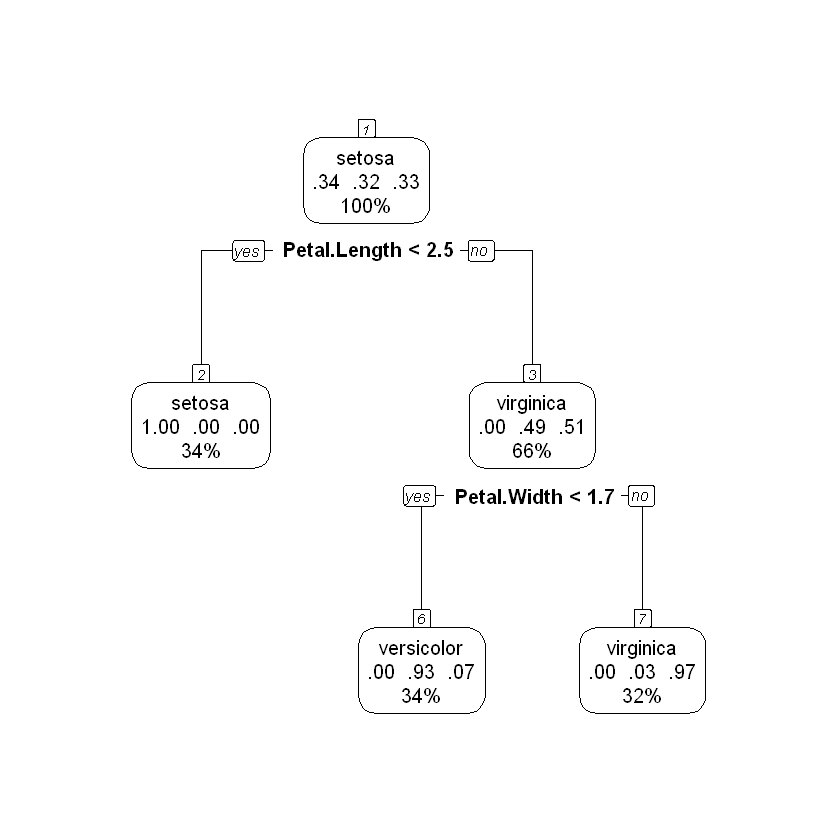

In [31]:
prp(iris.tree, type = 2, extra = 'auto', nn = TRUE, branch = 1, varlen = 0, yesno = 2)

### **Dự đoán kết quả**

In [36]:
y_pred2 = predict(iris.tree, testData)
y_pred2

In [37]:
y_pred = predict(iris.tree, testData, type = 'class')

In [38]:
# accuracy
result = table(y_pred, testData$Species)
result

            
y_pred       setosa versicolor virginica
  setosa          9          0         0
  versicolor      0         10         1
  virginica       0          1         9

In [40]:
acc = sum(diag(result)/sum(result))
acc

[1] 0.9333333

### **Prediction**

In [44]:
new_case = iris[c(1,10,100,140),]
new_case$Species = NULL
new_case

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
10,4.9,3.1,1.5,0.1
100,5.7,2.8,4.1,1.3
140,6.9,3.1,5.4,2.1


In [46]:
print('new predictions: ')
pred_new = predict(iris.tree, new_case, type = 'class')
pred_new

[1] "new predictions: "


1         10        100        140 
    setosa     setosa versicolor  virginica 
Levels: setosa versicolor virginica

## **Regression**

In [49]:
tree.gre = rpart(Petal.Length ~ Petal.Width, data = trainData)
tree.gre

n= 120 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 120 378.5299000 3.725833  
   2) Petal.Width< 0.8 41   0.9595122 1.458537 *
   3) Petal.Width>=0.8 79  57.4194900 4.902532  
     6) Petal.Width< 1.55 37  10.3627000 4.221622  
      12) Petal.Width< 1.35 21   3.3495240 3.904762 *
      13) Petal.Width>=1.35 16   2.1375000 4.637500 *
     7) Petal.Width>=1.55 42  14.7897600 5.502381 *

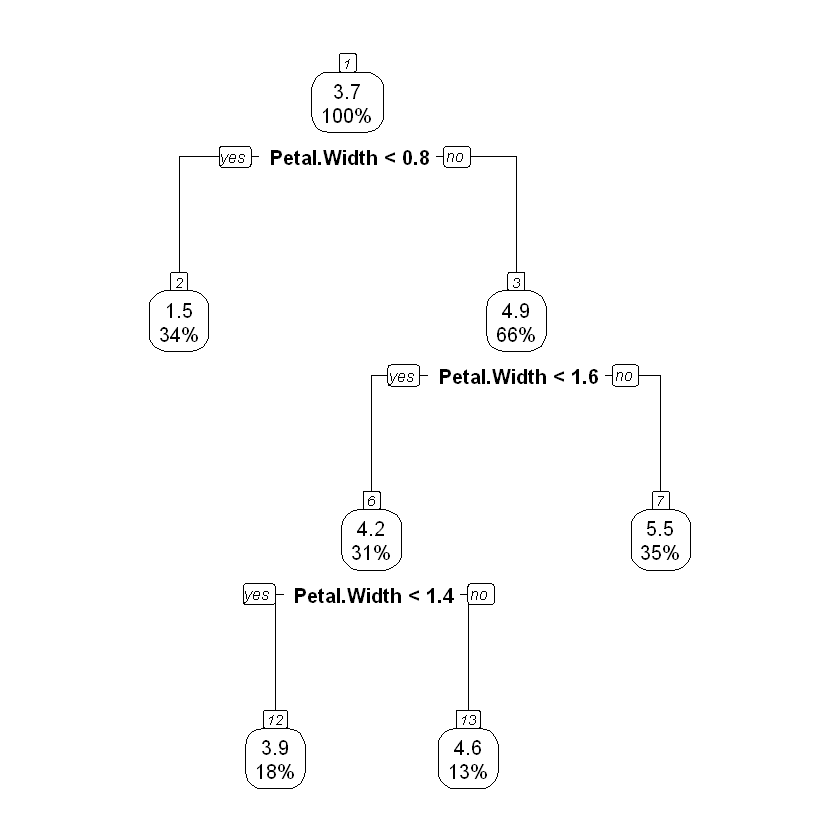

In [51]:
prp(tree.gre, type = 2, extra = 'auto', nn = TRUE, branch = 1, varlen = 0, yesno = 2)

In [52]:
install.packages('rattle')
install.packages('RColorBrewer')

Installing package into 'C:/Users/trung/OneDrive - VNU-HCMUS/Documents/R/win-library/4.1'
(as 'lib' is unspecified)

also installing the dependency 'bitops'




package 'bitops' successfully unpacked and MD5 sums checked
package 'rattle' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\trung\AppData\Local\Temp\Rtmp80SxN6\downloaded_packages


Installing package into 'C:/Users/trung/OneDrive - VNU-HCMUS/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'RColorBrewer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\trung\AppData\Local\Temp\Rtmp80SxN6\downloaded_packages


In [53]:
library(rattle)
library(RColorBrewer)

Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



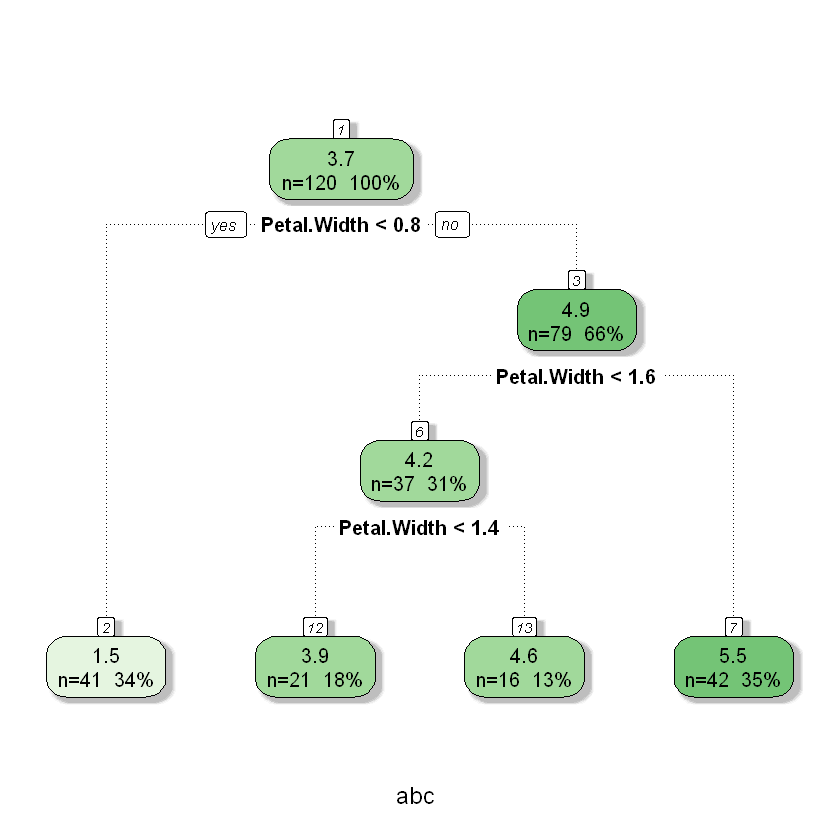

In [54]:
fancyRpartPlot(tree.gre, caption='abc')

### **Đánh giá**

In [63]:
newdf = data.frame(testData['Petal.Width'])
# newdf

In [65]:
predictions = predict(tree.gre, newdf)
# predictions

In [66]:
mse = mean((testData$Petal.Length - predictions)^2)
mse

[1] 0.15111

### **Prediction**

In [68]:
now = data.frame(Petal.Width = c(0.25,1.5,2.2))

predict_new = predict(tree.gre, now)
predict_new

1        2        3 
1.458537 4.637500 5.502381